<h1><center>FINAL TEST (PYTHON)</center></h1>

## 1.Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision

In [0]:
# Import pandas library
import numpy as np
import pandas as pd

# Import decision tree library
from sklearn.tree import DecisionTreeClassifier

## 2.Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [0]:
# visualisasi library
import seaborn as sns
from matplotlib import pyplot as plt

## 3.Loan Dataset

### 3.1 Import loan_data.csv

In [3]:
# Access to Drive (Upload data to drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/FINAL TEST/loan_data.csv')

### 3.2 Identifikasi tipe data dari masing-masing variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### 3.3 Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.

In [7]:
# 5 baris pertama
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
# summay data
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## 4.Lakukan pengecekan missing data dan duplicated-row

In [9]:
print('Missing Value (%) for Loan Dataset :', (sum(df.isna().sum())/(df.shape[0]*df.shape[1])*100))

Missing Value (%) for Loan Dataset : 0.0


### 4.1 Jika ada, sebutkan kolom apa yang ada missing data.
>> Tidak terdapat data missing pada dataset. Hal tersebut juga dapat dilihat berdasarkan visualisasi berikut. Jika terdapat missing maka visualisasi akan memberikan tanda dengan adanya warna tidak hitam.

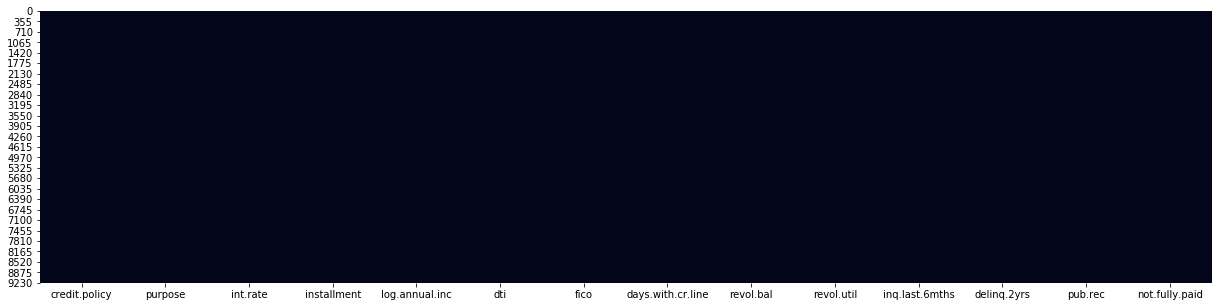

In [10]:
plt.figure(figsize=(21,5))
sns.heatmap(df.isnull(), cbar=False)

### 4.2 Apakah ada duplicated-row?

In [11]:
# select duplicate rows
duplicateRows = df.duplicated(subset=None, keep='first')

print("--"*8) 
print("Duplicate Rows :")
print("--"*8)
duplicateRows

----------------
Duplicate Rows :
----------------


0       False
1       False
2       False
3       False
4       False
        ...  
9573    False
9574    False
9575    False
9576    False
9577    False
Length: 9578, dtype: bool

>> Tidak terdapat duplicated row pada dataset

## 5.Lakukan pengecekan variabel target.

### 5.1 Ada berapa kategori pada variable target?

In [12]:
a = df['not.fully.paid'].unique()
print('Anggota Variabel Target :', a, 'maka dapat diketahui terdapat', len(a), 'kategori')

Anggota Variabel Target : [0 1] maka dapat diketahui terdapat 2 kategori


### 5.2 Berapa proporsinya?

In [39]:
print('Jumlah Data untuk Setiap Kategori (Proporsi):')
df['not.fully.paid'].value_counts()

Jumlah Data untuk Setiap Kategori (Proporsi):


0    8045
1    1533
Name: not.fully.paid, dtype: int64

### 5.3 Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

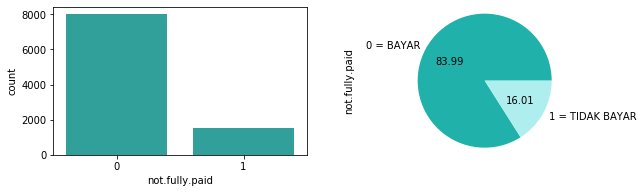

In [42]:
f = plt.figure(figsize=(10,6))
f.add_subplot(2,2,1)
sns.countplot(df['not.fully.paid'], color = 'lightseagreen')
f.add_subplot(2,2,2)
df['not.fully.paid'].value_counts().plot.pie(autopct = '%.2f', 
                                        labels= ['0 = BAYAR', '1 = TIDAK BAYAR'],
                                        colors = ['lightseagreen', 'paleturquoise'])
plt.axis('equal')
plt.show()

##6.Berapa variansi (ragam) nilai installment?

In [15]:
print('Variansi nilai instllment :', round(df['installment'].var(),3))

Variansi nilai instllment : 42878.524


## 7.Berapa nilai simpangan kuartil pada variable ‘installment’?

In [16]:
# Function to give index of the median 
def median(a, l, r): 
    n = r - l + 1
    n = (n + 1) // 2 - 1
    return n + l 
  
# Function to calculate IQR 
def IQR(a, n): 
  
    a.sort() 
  
    # Index of median of entire data 
    mid_index = median(a, 0, n) 
  
    # Median of first half 
    Q1 = a[median(a, 0, mid_index)] 
  
    # Median of second half 
    Q3 = a[median(a, mid_index + 1, n)] 
  
    # IQR calculation 
    return (Q3 - Q1) 
  
# Driver Function 
if __name__=='__main__': 
    a = np.array(df['installment'])
    n = len(a) 
    print('Simpangan Kuartil Variabel Installment :', IQR(a, n)) 
  

Simpangan Kuartil Variabel Installment : 269.22


In [17]:
# another way
from scipy.stats import iqr
print('Simpangan Kuartil Variabel Installment :', iqr(df['installment']))

Simpangan Kuartil Variabel Installment : 268.99249999999995


##8.Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [18]:
print("--"*25) 
print("Nilai Installment Tertinggi berdasarkan Purpose:")
print("--"*25)
df['installment'].groupby(df['purpose']).max()

--------------------------------------------------
Nilai Installment Tertinggi berdasarkan Purpose:
--------------------------------------------------


purpose
all_other             916.95
credit_card           922.42
debt_consolidation    940.14
educational           861.88
home_improvement      902.06
major_purchase        898.55
small_business        926.83
Name: installment, dtype: float64

##9.Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman

### 9.1 Ada berapa kategori pada variable tersebut?

In [19]:
print('Anggota Variabel Target :', list(df['purpose'].unique()))
print('Jumalah Kategori :', (len(df['purpose'].unique())))

Anggota Variabel Target : ['debt_consolidation', 'credit_card', 'all_other', 'home_improvement', 'small_business', 'major_purchase', 'educational']
Jumalah Kategori : 7


### 9.2 Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

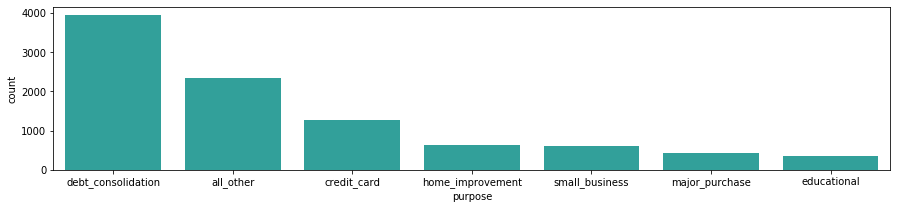

In [20]:
plt.figure(figsize=(15,3))
sns.countplot(df['purpose'], 
              color = 'lightseagreen', 
              order = df['purpose'].value_counts().index)

## 10.Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? 
Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.

In [21]:
df[['fico','not.fully.paid']].corr()

,fico,not.fully.paid
fico,1.000000,-0.149666
not.fully.paid,-0.149666,1.000000


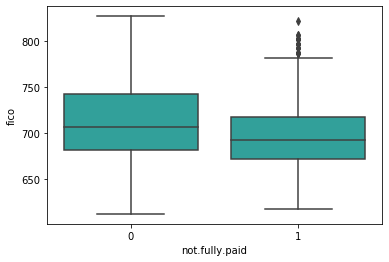

In [22]:
sns.boxplot(y=df["fico"], x=df['not.fully.paid'], color='lightseagreen')
plt.show()

>> Berdasarkan nilai korelasi antar dua variabel, maka dapat diketahui bahwa kedua variabel memiliki hubungan yang negatif dan sangat kecil. Dkarenakan korelasi antar kedua variabel keci, maka dapat dikatakan bahwa variabel vico tidak potensial untuk memprediksi target. Berdasarkan Box-Plot maka dapat menunjukkan range variabel fico jika dilihat berdasarkan kelompok target tidak jauh berbeda. Maka dapat dikatakan variabel fico tidak potensial.

## 11Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.

Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

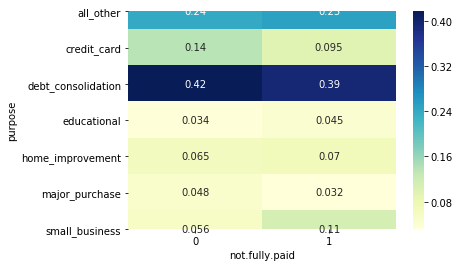

In [23]:
sns.heatmap(pd.crosstab(df['purpose'],df['not.fully.paid'],normalize='columns'),annot=True, cmap="YlGnBu")
plt.show()

>> Berdasarkan plot di atas, maka dapat diketahui bahwa proporsi setiap kategori dalam variabel purpose tidak jauh berbeda. Maka dapat dikatakan variabel purpose juga tidak potensial untuk memprediksi target. Hanya apda proporsi dengan purpose small_business dan credit_card yang menunjukkan perbedaan yang signifikan jika dibandingkan dengan target.

## 12.Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [24]:
print('Rata-rata dari int.rate untuk purpose dengan kategori credit_card :',
      round(df[df['purpose'] == 'credit_card'].mean()['int.rate'],3))

Rata-rata dari int.rate untuk purpose dengan kategori credit_card : 0.12


## 13.Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [25]:
installment200 = (df['installment']>200)
pendidikan = (df['purpose'] == 'educational')
jumlah = len(df[installment200 & pendidikan])
print('Jumlah kasus pinjaman yang nilai installment-nya > 200 dan tujuan pinjamannya = pendidikan adalah',jumlah)


Jumlah kasus pinjaman yang nilai installment-nya > 200 dan tujuan pinjamannya = pendidikan adalah 137


## 14.Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [26]:
loans3 = df[df['purpose']=='credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


## 15.Siapkan data untuk pemodelan

### 15.1 Ubah data kategorik menjadi dummy variabel

In [27]:
# get dummies variabel
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### 15.2 Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [28]:
final_data = df_dummies
final_data.shape

(9578, 19)

## 16.Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [0]:
from sklearn.model_selection import train_test_split

X=final_data.drop(columns='not.fully.paid')
y=final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 17.Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [30]:
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 18.Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [0]:
predictions = DecisionTreeClassifier.predict(X_test)

## 19.Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [33]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predictions'])
print (confusion_matrix)

Predictions     0    1
Actual                
0            1986  445
1             344   99


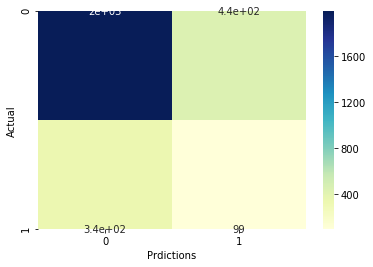

In [38]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Prdictions'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")

Berdasarkan confusion matrix, maka diperoleh bahwa model belum cukup baik dalam memprediksi TARGET =1 (nilai positif)> Hal ini dapat dilihat berdasarkan nilai True Positif yang rendah (99) dan nilai False Positif (445) yang tinggi.

## 20.Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [37]:
from sklearn.metrics import confusion_matrix
cov = confusion_matrix(predictions,y_test)
total = sum(sum(cov))

accuracy=(cov[0,0]+cov[1,1])/total
print('Accuracy    : ', round(accuracy*100,2))

specificity = cov[0,0]/(cov[0,0]+cov[0,1])
print('Specificity : ', round(specificity*100,2))

sensitivity = cov[1,1]/(cov[1,0]+cov[1,1])
print('Sensitivity : ', round(sensitivity*100,2))

Accuracy    :  72.55
Specificity :  85.24
Sensitivity :  18.2


Berdasarkan nilai akurasi maka dapat dilihat akurasi sudah cukup tinggi, namu nilai sensitifitas sangat rendah. Maka dapat dikatakan model belum cukup baik dalam memprediksi respon. Hal ini diduga disebabkan target memiliki kategori target yang *imbalance* dan perlu dilakukan analsis lebih lanjut.